<a href="https://colab.research.google.com/github/ptobarra/spain-ai-python-course-20201122/blob/main/Intro_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset


A lo largo de esta práctica analizaremos el set de datos del Titanic. 

El objetivo de la práctica será responder a la pregunta: **¿Qué factores influyeron en la supervivencia de los pasajeros?**

La práctica constará de las siguientes fases:
 1. Primeros pasos con el dataset
 2. Exploración del dataset y generación de estadísticas
 3. Presentación de resultados
 
 Y si tenemos tiempo para más, construiremos un modelo en base a nuestras conclusiones para predecir la supervivencia. Compararemos nuestro modelo con un árbol de decisión que generaremos a partir del dataset.
 
**IMPORTANTE**: este documento esta escrito utilizando notación markdown. Aquí teneis un buen [manual](https://daringfireball.net/projects/markdown/syntax)

**IMPORTANTE2**: aquí teneis unas cuantas Cheat Sheets que te haran la vida más fácil en estos primeros pasos con Pandas:


*   [Pandas cheat sheet 1](https://drive.google.com/file/d/1RZSVTOOevBay4rkMNrIv7CADwyfUE0lE/view?usp=sharing)
*   [Pandas cheat sheet 2](https://drive.google.com/file/d/1nSaiyHOqY5CF2FbfrgVNOb1xRrmT4l9U/view?usp=sharing)
*   [Pandas cheat sheet 3](https://drive.google.com/file/d/1GhqAKE9qfimIfqO7o2__bwyi5pvud68a/view?usp=sharing)



### Primeros pasos con el dataset:
El objetivo de esta sección es que nos familiarizemos con Pandas y seamos capaces de manipular el dataset a nuestro interés.

Lo primero que tendremos cargar son nuestros datos, en este caso en formato ```csv``` en un dataset. [Pandas gestiona múltiples inputs/outputs](http://pandas.pydata.org/pandas-docs/stable/io.html) con lo cual tendremos que usar el específico para este caso: [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv) donde definiremos el separador y el path del fichero (el resto de parámetros no será necesario tocarlos en este caso):

In [68]:
import pandas

# nos vamos a traer los datos de esta url: http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

url_datos_titanic = 'http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
separador = ","
dataset = pandas.read_csv(filepath_or_buffer=url_datos_titanic, sep=separador)

In [69]:
dataset.shape

(887, 8)

In [70]:
pandas

<module 'pandas' from '/usr/local/lib/python3.6/dist-packages/pandas/__init__.py'>

In [71]:
pandas.DataFrame.head?

In [72]:
dataset.head(6)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583


Ya tenemos nuestra variable ```dataset``` con todo el dataset cargado en memoria. Para empezar a explorar nuestro dataset vamos a utilizar algunos [procesos de Pandas](http://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html). Por ejemplo, respondamos a las siguientes preguntas:
 * ¿Cuantas filas y columnas contiene el dataset?
 * ¿Cual es el nombre de las columnas que incluye el dataset?
 * ¿Qué información contiene la primera fila del dataset?¿Y la última?
 Para contestar a estas preguntas utilizaremos las funciones ```.shape```, ```.columns```, ```.head()``` y ```.tail()```

In [73]:
print("El numero de filas y columnas que incluye el dataset es: ",dataset.shape)
print("\nLos nombres de las columnas son: \n",dataset.columns)
print("\nLa primera fila del dataset es: \n",dataset.head(1))
print("\nLa última fila del dataset es: \n",dataset.tail(1))

El numero de filas y columnas que incluye el dataset es:  (887, 8)

Los nombres de las columnas son: 
 Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

La primera fila del dataset es: 
    Survived  Pclass                    Name   Sex   Age  \
0         0       3  Mr. Owen Harris Braund  male  22.0   

   Siblings/Spouses Aboard  Parents/Children Aboard  Fare  
0                        1                        0  7.25  

La última fila del dataset es: 
      Survived  Pclass                Name   Sex   Age  \
886         0       3  Mr. Patrick Dooley  male  32.0   

     Siblings/Spouses Aboard  Parents/Children Aboard  Fare  
886                        0                        0  7.75  


A continuación una descripción de las distintas columnas obtenida de la web de [Stanford](http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

![Titanic&Python](https://i.imgur.com/CKN4TeO.png)

Ahora vamos a aprender a manejarnos con nuestro dataset, para ello vamos a utilizar distintas técnicas que se describen perfectamente en la [documentación](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html). 

En esta primera parte utilizaremos las funciones ```.loc``` para seleccionar subconjuntos de nuestro dataset. 

Ahora que tenemos claro el uso de ```.loc``` , vamos a operar con nuestro dataset. Por ejemplo vamos a seleccionar las columnas: Name, Sex, Age y las filas de la 3 a la 5 (recordar que en nuestro dataset la primera fila tiene asociado el índice 1 y así sucesivamente:

In [74]:
print("Imprimir las filas 3 a 5 y columnas Name, Sex, Age\n", \
      dataset.loc[3:5, ['Name', 'Sex', 'Age']])

Imprimir las filas 3 a 5 y columnas Name, Sex, Age
                                           Name     Sex   Age
3  Mrs. Jacques Heath (Lily May Peel) Futrelle  female  35.0
4                      Mr. William Henry Allen    male  35.0
5                              Mr. James Moran    male  27.0


In [75]:
dataset.loc[[10, 100, 800], ['Age', 'Survived']]

,Age,Survived
10,4.0,1
100,29.0,0
800,27.0,1


Sin embargo, ahora quiero seleccionar las 4 primeras filas del dataset y la tercera y cuarta columnas:

In [76]:
print("Imprimir las 4 primeras filas y columnas tercera y cuarta\n", \
      dataset.loc[:3, ['Name', 'Sex']])

Imprimir las 4 primeras filas y columnas tercera y cuarta
                                                 Name     Sex
0                             Mr. Owen Harris Braund    male
1  Mrs. John Bradley (Florence Briggs Thayer) Cum...  female
2                              Miss. Laina Heikkinen  female
3        Mrs. Jacques Heath (Lily May Peel) Futrelle  female


In [77]:
dataset.loc[:3, ['Name', 'Sex']]

,Name,Sex
0,Mr. Owen Harris Braund,male
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female
2,Miss. Laina Heikkinen,female
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,female


In [78]:
# te imprime todos losvalores distintos de Sex en dataset
dataset.loc[:, 'Sex'].unique()

array(['male', 'female'], dtype=object)

In [79]:
# te dice cuantas veces se repite cada uno de los valores que puede tomar la variable
dataset.loc[:, 'Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [80]:
# sacamos el nombre y la edad de los pasajeros mayores de 70 años y que van en 1a clase
dataset.loc[(dataset['Age']>70)&(dataset['Pclass']==1),['Name', 'Age']]

,Name,Age
95,Mr. George B Goldschmidt,71.0
490,Mr. Ramon Artagaveytia,71.0
627,Mr. Algernon Henry Wilson Barkworth,80.0


Perfecto!, ya sabemos seleccionar filas y columnas!, ahora el objetivo es hacer modificaciones. Por ejemplo cambiemos a Allen, Mr. William Henry su edad (actualmente 35 años) por 260. Para ello tendremos que seleccionar la fila en la que la columna 'Name' sea igual a 'Allen, Mr. William Henry', de la siguiente manera:

In [81]:
print("Edad de Allen, Mr. William Henry:\n ", \
      dataset.loc[dataset['Name']=='Mr. William Henry Allen','Age'])

Edad de Allen, Mr. William Henry:
  4    35.0
Name: Age, dtype: float64


Para modificar este valor, tendremos que asignarle el que queremos (260):

In [82]:
# Asignar nueva edad al pobre Allen:
dataset.loc[dataset['Name']=='Mr. William Henry Allen','Age'] = 260

¿Cual es ahora la edad de Allen?

In [83]:
print("La nueva edad de Allen, Mr. William Henry:\n ", dataset.loc[dataset['Name']=='Mr. William Henry Allen','Age'])

La nueva edad de Allen, Mr. William Henry:
  4    260.0
Name: Age, dtype: float64


In [84]:
# Asignar nueva edad al pobre Allen:
dataset.loc[dataset['Name']=='Mr. William Henry Allen','Age'] = 35

Como vemos, ya hemos editado su edad!. Aunque le devolveremos a los 54 años, a estas alturas ya sabemos seleccionar subsets de datos y editarlos si lo necesitamos.

In [85]:
# Devolvamos a Allen su edad:
dataset.loc[dataset['Name']=='Mr. William Henry Allen','Age'] = 54

In [86]:
print("La nueva edad de Allen, Mr. William Henry:\n ", dataset.loc[dataset['Name']=='Mr. William Henry Allen','Age'])

La nueva edad de Allen, Mr. William Henry:
  4    54.0
Name: Age, dtype: float64


### Exploración del dataset y generación de estadísticas
¿Qué sabemos por ahora de nuestros datos? Practicamente nada!. Vamos a utilizar una serie de funciones que se incluyen en Pandas para obtener facilmente valiosa información de los mismos. 

El primera información que se ha de obtener cuando por primera vez se trabaja con un dataset es la cantidad de ```NAN``` incluidos en el mismo, para ello utilizaremos la función ```.info()``` de Pandas:

In [87]:
# Obtener información sobre el número de valores NAN que se incluyen en el dataset:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None


Como podemos ver el dataset es bastante completo y no se incluyen valores a ```NAN``` en este caso. Para vuestra referencia, Pandas incluye valiosa [documentación](http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) para manejar ```NAN```. Aquí no vamos a entrar a manejar estos valores, pero tener en cuenta esta información!.

Bien, ya sabemos que el dataset esta limpio de ```NAN```, pero volvemos a la pregunta de antes: **¿Qué sabemos de la información que contiene el dataset?** Seguimos igual, practicamente nada!

Pues bien, Pandas incluye la función ```.describe()``` la cual permite obtener estadísticas básicas sobre las distintas columans del dataset: 

In [88]:
pandas.set_option('display.max_columns', 10)

In [89]:
print("Imprimir estadísticas básicas del dataset: \n", dataset.describe())

Imprimir estadísticas básicas del dataset: 
          Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.492864                 0.525366   
std      0.487004    0.836662   14.144695                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%             

¿Qué información incluye ```.describe()``` para cada columna? 
 * Número de valores (count)
 * Media (mean)
 * Desviacion Estandar (std)
 * Valor mínimo (min)
 * Valor máximo (max)
 * Primer percentil (25%)
 * Mediana (50%)
 * Tercer percentil (75%)

Aquí ya tenemos información útil!!!, ya podemos responder a las siguientes preguntas:
 * ¿Qué porcentaje de supervivientes hubo? 
 * ¿Cual era la media de edad? 
 * ¿Cual fue el ticket (Fare) más caro pagado?¿Y el que menos?  y 
 * ¿Cuantas clases (Pclass) incluye el barco?

No echais de menos una columna? 'Sex' no esta incluida en este análisis, porque? Si os fijais en la información de ```.describe()``` aquí solo se han incluido las columnas numéricas (float o int64). vamos a echar un vistazo a 'Sex' para entender el formato que tiene:

In [90]:
print(dataset.loc[:, 'Sex'].head())

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


Como vemos "male" y "female" son los valores incluidos, comprobemos que estos son los únicos valores que se incluyen para todo el dataset

In [91]:
# Imprimimos todos los valores de Sex en el dataset:
print(dataset.loc[:, 'Sex'].unique())

['male' 'female']


In [92]:
# ¿Cuantos hombres y mujeres hay en el dataset?:
print(dataset.loc[:, 'Sex'].value_counts(normalize=True))

male      0.645998
female    0.354002
Name: Sex, dtype: float64


Como este formato nos impide trabajar con la función ```.describe()```, vamos a transformar esta columna en otros valores que nos sean de más utilidad. Para ello definiremos una función en python que asigne 1 a 'female' y 0 a 'male', después utilizaremos la función [Apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) de Pandas para modificar estos valores en el dataset:

In [93]:
# definir functión que haga el cambio:
def gender_number(gender):
    if gender == 'male': return 0.
    return 1.

# Aplicar el cambio a todas las filas con la función Apply:
# dataset.Sex = dataset.Sex.apply(gender_number) # <- seria lo mismo que la linea de abajo!
dataset.Sex = dataset.loc[:, 'Sex'].apply(lambda x: 0 if x == 'male' else 1)

Fijate que hemos usado una función lambda dentro del apply de Pandas. Las funciones lambda son maneras sencillas de definir funciones y siguen la siguiente estructura:

![texto alternativo](https://i.imgur.com/MBrWFCF.jpg)

¿Que aspecto tiene ahora 'Sex'?

In [94]:
# Imprimimos todos los valores de Sex en el dataset:
print(dataset.loc[:, 'Sex'].unique())

[0 1]


Bien!, ejecutemos ahora ```.describe()``` de nuevo sobre la columna 'Sex'

In [95]:
# Obtengamos estadísticas de 'Sex'
print(dataset.loc[:, 'Sex'].describe())

count    887.000000
mean       0.354002
std        0.478480
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64


In [96]:
#vemos el % de pasajeros que habia en cada una de las 3 clases
dataset.loc[:, 'Pclass'].value_counts(normalize=True)

3    0.549042
1    0.243517
2    0.207441
Name: Pclass, dtype: float64

Vaya, parece que no ayuda a entender como están distribuidos los sexos? Parece que no. Probemos algo nuevo: [Agregaciones con Pandas!](http://pandas.pydata.org/pandas-docs/stable/groupby.html). Como ejemplo realizaré una agregación para comprobar cuantos hombre y mujeres había en el barco:

In [97]:
# Obtener el recuento de hombres y mujeres en el barco:
print(dataset.groupby(['Sex']).count().iloc[:,1])

Sex
0    573
1    314
Name: Pclass, dtype: int64


¿Cuantos hombres y mujeres había? 

Hagamos una cosa ahora, con el objetivo de entender como están distribuidos los pasajeros por edades vamos a crear una nueva columna llamada 'Age_ranges' que incluya el rango de edad a la que cada pasajero corresponde. El objetivo será obtener cuantos pasajeros hay en el rango [0-10), [10,20) .... 

In [98]:
dataset['Age_ranges'] = pandas.cut(dataset['Age'], [0, 10, 50, 90], labels=['niño', 'adulto', 'senior'])

In [99]:
dataset.loc[dataset['Age_ranges']=='senior', ['Age_ranges', 'Age']]

,Age_ranges,Age
4,senior,54.0
6,senior,54.0
11,senior,58.0
15,senior,55.0
33,senior,66.0
...,...,...
816,senior,52.0
825,senior,62.0
847,senior,74.0
853,senior,51.0


In [100]:
# hacemos tambien rangos para precios
dataset['Fare_ranges'] = pandas.cut(dataset['Fare'], [0, 15, 32, 100, 550], labels=['low', 'middle', 'high', 'very high'])

In [101]:
dataset['Fare_ranges'].value_counts()

low          440
middle       221
high         158
very high     53
Name: Fare_ranges, dtype: int64

In [102]:
# vemos cuantas filas y cuantas columnas tiene el dataset con 'Fare' > 32
dataset.loc[dataset['Fare']>32].shape

(211, 10)

¿Cómo están distribuidos los pasajeros por rangos de edad en el barco?

In [103]:
# Imprimir distribución de rangos de edad en el barco:
print(dataset.groupby('Age_ranges').count().iloc[:,1])

Age_ranges
niño       73
adulto    741
senior     73
Name: Pclass, dtype: int64


In [104]:
# esta instruccion hace lo mismo que la anterior
dataset['Age_ranges'].value_counts()

adulto    741
senior     73
niño       73
Name: Age_ranges, dtype: int64

¿Cuantos niños menores de 10 años hay incluidos? 

Y ahora... ¿Quien sabría decir como están distribuidos los pasajeros por edades y sexos?

In [105]:
# Imprimir distribución de rangos de edad en el barco por sexo:
print(dataset.groupby(['Sex','Age_ranges']).count().iloc[:,1])

Sex  Age_ranges
0    niño           37
     adulto        481
     senior         55
1    niño           36
     adulto        260
     senior         18
Name: Pclass, dtype: int64


Creo que llegados a este punto, ya no deberíamos tener problemas en poder sacar los factores que influyeron en la supervivencia de los pasajeros en el Titanic. Por ejemplo, ¿como se distribuyen los supervivientes por sexo?, ¿y por edades, clase, precio del billete, etc?

In [106]:
# Distribución de supervivientes por edades:
print(dataset.groupby(['Age_ranges', 'Survived']).count().iloc[:,1])
print('\n')

# Distribución de supervivientes por sexo:
print(dataset.groupby(['Sex', 'Survived']).count().iloc[:,1])
print('\n')

# Distribución de supervivientes por clase:
print(dataset.groupby(['Pclass', 'Survived']).count().iloc[:,1])
print('\n')

# Distribucion de supervivientes por sexo y clase
print(dataset.groupby(['Sex', 'Pclass', 'Survived']).count().iloc[:,1])

Age_ranges  Survived
niño        0            32
            1            41
adulto      0           462
            1           279
senior      0            51
            1            22
Name: Name, dtype: int64


Sex  Survived
0    0           464
     1           109
1    0            81
     1           233
Name: Name, dtype: int64


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           368
        1           119
Name: Sex, dtype: int64


Sex  Pclass  Survived
0    1       0            77
             1            45
     2       0            91
             1            17
     3       0           296
             1            47
1    1       0             3
             1            91
     2       0             6
             1            70
     3       0            72
             1            72
Name: Age, dtype: int64


Bueno, ya tenemos el número de pasajeros que sobrevivieron por edad, sexo y clase, pero lo ideal (y esperado) es tener el porcentage de supervivencia por edad, sexo, clase, etc. 

Por ejemplo, el porcentaje de superviviencia por edades lo podemos calcular de la siguiente manera:

Un pasajero que sobrevive tiene valor 1 y uno que no sobrevive toma el valor 0, con lo cual, si sobreviven 5 pasajeros de 10, la media será igual al porcentaje de supervivencia.

In [107]:
# Porcentaje de supervivientes por edad:
print(dataset.groupby('Age_ranges').mean().loc[:,'Survived'])

Age_ranges
niño      0.561644
adulto    0.376518
senior    0.301370
Name: Survived, dtype: float64


OK, ¿Cuales son los porcentajes de superviviencia por edades, edades y sexos, y demás combinaciones que se te ocurran? 

In [108]:
# Porcentaje de supervivientes por Sexo:
print(dataset.groupby(['Sex']).mean().loc[:,'Survived'])
print('\n')

# Porcentaje de supervivientes por Pclass:
print(dataset.groupby(['Pclass']).mean().loc[:,'Survived'])
print('\n')

# Porcentaje de supervivientes por Sexo y edad:
print(dataset.groupby(['Sex', 'Age_ranges']).mean().loc[:,'Survived'])
print('\n')

# Porcentaje de supervivientes por Sexo y Pclass:
print(dataset.groupby(['Sex', 'Pclass']).mean().loc[:,'Survived'])

Sex
0    0.190227
1    0.742038
Name: Survived, dtype: float64


Pclass
1    0.629630
2    0.472826
3    0.244353
Name: Survived, dtype: float64


Sex  Age_ranges
0    niño          0.567568
     adulto        0.170478
     senior        0.109091
1    niño          0.555556
     adulto        0.757692
     senior        0.888889
Name: Survived, dtype: float64


Sex  Pclass
0    1         0.368852
     2         0.157407
     3         0.137026
1    1         0.968085
     2         0.921053
     3         0.500000
Name: Survived, dtype: float64


In [109]:
# % de hombres que sobrevivieron agurpados por sexo y clase
print(dataset.loc[dataset['Sex']==0, :].groupby(['Age_ranges', 'Pclass']).mean().loc[:,'Survived'])

Age_ranges  Pclass
niño        1         1.000000
            2         1.000000
            3         0.384615
adulto      1         0.417582
            2         0.080460
            3         0.122112
senior      1         0.172414
            2         0.083333
            3         0.000000
Name: Survived, dtype: float64


In [110]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Age_ranges,Fare_ranges
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500,adulto,low
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833,adulto,high
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250,adulto,low
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000,adulto,high
4,0,3,Mr. William Henry Allen,0,54.0,0,0,8.0500,senior,low


Ahora si!, ¿Que factores influyeron principalmente en la supervivencia de los pasajeros?
* Género
* Clase
* Edad

### Presentación de resultados
Cuando se trabaja en ciencia de datos, es muy importante no sólo saber analizar los datos con los que se trabaja y obtener conclusiones, sino también **comunicar de una manera efectiva y clara los resultados** al resto de participantes para que estos puedan entender las conclusiones y el trabajo realizado. Por esta razón, vamos a generar una serie de gráficas que sirvan para representar de una manera clara y contundente los resultados de nuestro analisis.

El primer tipo de gráficas que vamos a generar van a ser para describir las variables que incluye el dataset, por ejemplo representar como se distribuyen los pasajeros por clases, por sexos, por edades....

[Pandas y Matplotlib](http://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) permiten generar gráficas a partir de los [dataframes](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) con los que hemos estado trabajando.

Por ejemplo, a continuación se muestra una representación con [boxplots](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) donde podemos ver una información similar a la que la función ```.describe()``` ofrece:

In [111]:
# definir functión que haga el cambio:
def numbertogender(gender):
    if gender == 0.: return 'male'
    return 'female'

# Aplicar el cambio a todas las filas con la función Apply:
dataset.loc[:, 'Sex'] = dataset.loc[:, 'Sex'].apply(numbertogender)

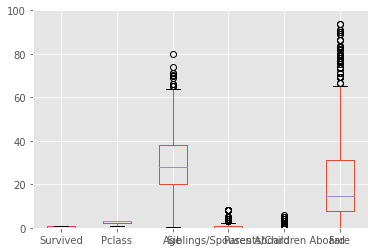

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

# Seleccionamos el estilo de las gráficas:
plt.style.use('ggplot')

# Generamos el Boxplot:
dataset.boxplot(return_type='axes')

# Representamos la gráfica:
plt.ylim([0, 100])
plt.show()




No parece gran cosa, vamos a mejorar el estilo de la gráfica:


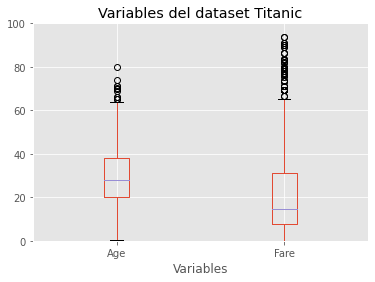

In [113]:
# Generamos el Boxplot, quitando la columna 'PassengerId','Survived','Pclass','SibSp','Parch':
dataset.loc[:,~dataset.columns.isin(['PassengerId','Survived','Pclass','Siblings/Spouses Aboard','Parents/Children Aboard'])].boxplot(return_type='axes')

# Añadimos título y etiquetas:
plt.title('Variables del dataset Titanic')
plt.xlabel('Variables')
plt.ylim([0,100])

# Representamos la gráfica:
plt.show()

¿Qué podemos conclusiones podemos sacar a partir de esta representación?
* Mediana (rojo)
* Primer y tercer quartil

¿Cómo se genera un histograma de cualquier variable?, A continuación muestro como se genera el histograma de la columna 'Age':

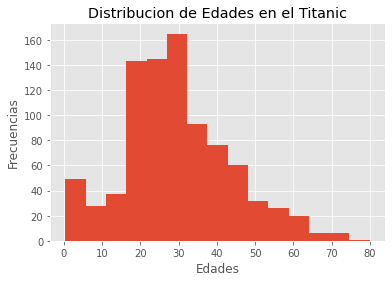

In [114]:
# Generamos el histograma de Age:
dataset.loc[:,'Age'].hist(bins=15)

# Añadimos título y etiquetas:
plt.title('Distribucion de Edades en el Titanic')
plt.xlabel('Edades')
plt.ylabel('Frecuencias')

# Representamos la gráfica:
plt.show()

¿Podrías generar un histograma para la columna ```Fare```?

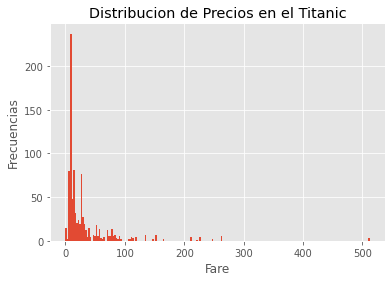

In [115]:
# Generamos el histograma de Fare:
dataset.loc[:,'Fare'].hist(bins=200)

# Añadimos título y etiquetas:
plt.title('Distribucion de Precios en el Titanic')
plt.xlabel('Fare')
plt.ylabel('Frecuencias')

# Representamos la gráfica:
plt.show()


¿Podriamos ver como se distribuyen los pasajeros por edades y por otra variable (género, supervivencia, clase....)? Echale un vistazo a la documentación!

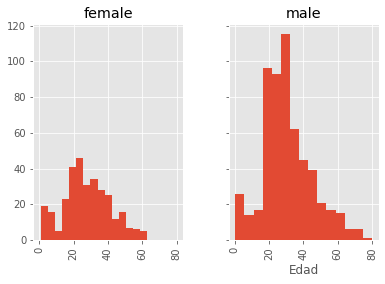

In [116]:
# Generamos el histograma de Age por Sex:
dataset.loc[:,['Age','Sex']].hist(bins=15,by='Sex',sharey=True, sharex=True)

plt.ylabel('Frecuencias')
plt.xlabel('Edad')

# Representamos la gráfica:
plt.show()

Otra opción es:

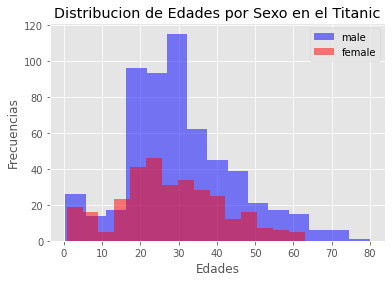

In [117]:
# Generamos el histograma de Age por Sex:
dataset.loc[dataset.Sex=='male','Age'].hist(bins=15,color='blue',alpha=0.5,label='male')
dataset.loc[dataset.Sex=='female','Age'].hist(bins=15,color='red',alpha=0.5,label='female')

# Añadimos título y etiquetas:
plt.title('Distribucion de Edades por Sexo en el Titanic')
plt.xlabel('Edades')
plt.ylabel('Frecuencias')
plt.legend()

# Representamos la gráfica:
plt.show()

¿Cómo se distribuyen los pasajeros por edad y por clase? (selecciones [colores](http://html-color-codes.info/) para cada una de las clases)

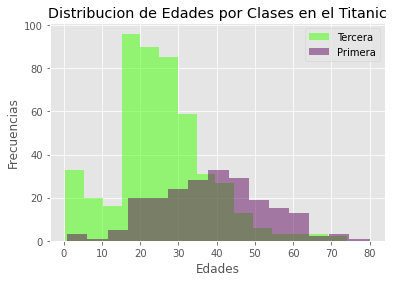

In [118]:
# Generamos el histograma de Age por clase:
dataset.loc[dataset.Pclass==3,'Age'].hist(bins=15,color='#40FF00',alpha=0.5,label='Tercera')
#dataset.loc[dataset.Pclass==2,'Age'].hist(bins=15,color='#00FFFF',alpha=0.5,label='Segunda')
dataset.loc[dataset.Pclass==1,'Age'].hist(bins=15,color='#610B5E',alpha=0.5,label='Primera')

# Añadimos título y etiquetas:
plt.title('Distribucion de Edades por Clases en el Titanic')
plt.xlabel('Edades')
plt.ylabel('Frecuencias')
plt.legend()

# Representamos la gráfica:
plt.show()

Ahora vamos a empezar a generar gráficas para demostrar como se distribuyen los supervivientes por Sexo, Clase y Edad. Antes vimos que esta información la obteniamos haciendo agrupaciones sobre el dataset. En este caso repetiremos el proceso y lo representaremos, por ejemplo el siguiente proceso muestra como se distribuyen los pasajeros por sexo y los porcentajes de superviviencia asociados a los mismos:

In [119]:
# crear una función para representar variables categóricas:

def plot_categorical(df, var_name, target_name, width=7, height=5, color='#13A844'):
   proporcion_target =  pandas.DataFrame((df[target_name]).groupby(df[var_name]).mean())
   distribucion_categoria = pandas.DataFrame((df[target_name]).groupby(df[var_name]).count())

   fig = plt.figure(figsize=(width, height))
   ax = distribucion_categoria[target_name].plot(kind='bar', color=color)
   ax.set_ylabel('Numero de samples', color=color)
   ax2 = ax.twinx()
   ax2.grid(False)
   ax2.plot(proporcion_target[target_name].values, color='r', linestyle='-', alpha=0.9, marker = '.', markeredgewidth = 2, linewidth=1.0)
   ax2.set_ylabel('ratio target', color='r')
   plt.title('Descripción de variable ' + var_name)
   plt.show()

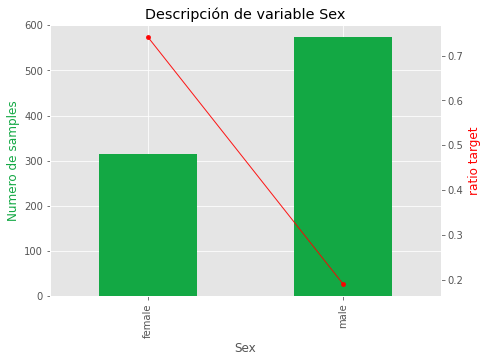

In [120]:
plot_categorical(dataset, 'Sex', 'Survived')

¿Podriamos hacer lo mismo con 'Age_ranges' o 'Pclass'?

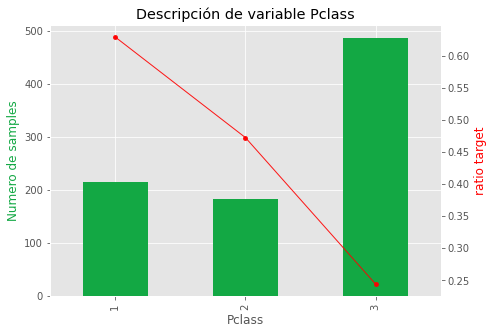

In [121]:
# Age_ranges
plot_categorical(dataset, 'Pclass', 'Survived')

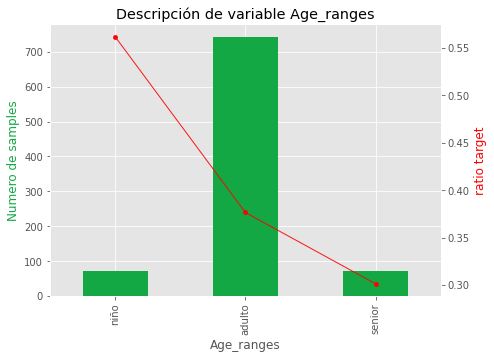

In [122]:
# Age_ranges
plot_categorical(dataset, 'Age_ranges', 'Survived')


Por último, vamos a comprobar como se distribuye la probabilidad de supervivencia por Sexo y por Clase, para ello, vamos a utilizar la función [pivot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html).

In [123]:
# Este es el dataframe que vamos a representar:
print(dataset.groupby(['Sex','Pclass']).mean().reset_index().pivot(index='Pclass',columns='Sex',values='Survived'))

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.137026


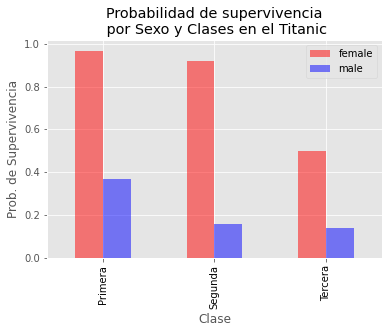

In [124]:
dataset.groupby(['Sex','Pclass']).mean().reset_index().pivot(
    index='Pclass',columns='Sex',values='Survived').plot.bar(color=['red','blue'],alpha=0.5)

# Añadimos título y etiquetas:
plt.title('Probabilidad de supervivencia\n por Sexo y Clases en el Titanic')
plt.xlabel('Clase')
plt.ylabel('Prob. de Supervivencia')
plt.xticks(range(3), ['Primera', 'Segunda', 'Tercera'], color='black')
plt.legend()

plt.show()

Felicidades!, llegados a este punto ya hemos representado visualemente las conclusiones que obtuvimos en un primer momento. Hemos demostrado que la probabilidad de superviviencia viene mayormente determinada por el Sexo, Clase y en menor medida por la Edad (y probablemente sea también factor de otras variables que no hemos analizado en este ejercicio. Podriamos crear un modelo que nos sirviera para saber si un pasajero sobrevive o no?